### 📈  Variables in dataset
 1. Year: 2008
 2. Month: 11 (November)
 3. DayofMonth: 1-31
 4. DayOfWeek: 1 (Monday) - 7 (Sunday)
 5. DepTime: actual departure time (hhmm)
 6. CRSDepTime: scheduled departure time (hhmm)
 7. ArrTime: actual arrival time (hhmm)
 8. CRSArrTime scheduled arrival time (hhmm)
 9. UniqueCarrier: unique carrier code
 10. FlightNum: flight number
 11. TailNum: plane tail number
 12. ActualElapsedTime: actual elapsed time of flight (estimated elapse time) in minutes
 13. CRSElapsedTime: CRS elapsed time of flight (estimated elapse time) in minutes
 14. AirTime: flight time in in minutes
 15. ArrDelay: difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
 16. DepDelay: TARGET -  Difference in minutes between scheduled and actual departure time. Early departures show negative numbers, in minutes
 17. Origin: origin IATA airport code
 18. Dest: destination IATA airport code
 19. Distance: distance between airports (miles)
 20. TaxiIn: wheels down and arrival at the destination airport gate, in minutes
 21. TaxiOut: The time elapsed between departure from the origin airport gate and wheels off, in minutes
 22. Cancelled: was the flight cancelled?
 23. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
 24. Diverted: 1 = yes, 0 = no
 25. CarrierDelay: carrier delay in minutes
 26. WeatherDelay: weather delay in minutes
 27. NASDelay: NAS delay in minutes
 28. SecurityDelay: security delayin minutes
 29. LateAircraftDelay: late aircraft delay in minutes

### To predict a flight arrival delay, I applied Pycaret library that allows to clean data (delete dublicates, fill in NAs with mean values, etc.), normalize them, transform categogial variables into numeric ones, build several the most popular models at the same time, and much more.

In [ ]:
!pip install pycaret-nightly
!pip install --pre pycaret
!pip install eli5
!pip install graphviz

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import eli5
import graphviz
from xgboost import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder

### We can load the full data from the file or a part of them

In [15]:
nRowsRead = None # specify number of rows to read - print None if want to read whole file
file_path = 'DelayedFlights.csv'
data = pd.read_csv(file_path, header=0, nrows=nRowsRead)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1936758 rows and 30 columns


In [16]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [17]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
print(data.isna().sum())

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [20]:
clean_df = data.dropna() # I've just droped NAs. Pycaret can change NA values by mean values but not too much! So I prefer to delete them all

In [21]:
print(clean_df.isna().sum())

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [22]:
clean_df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [23]:
#First of all we have to split our data into train and test datasets
train_df, test_df = train_test_split(clean_df, test_size=0.20, random_state=1)

print('Data for Modeling: ' + str(train_df.shape))
print('Unseen Data For Predictions: ' + str(test_df.shape))

Data for Modeling: (997987, 29)
Unseen Data For Predictions: (249497, 29)


In [24]:
feats = train_df.select_dtypes('number').columns
feats

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [25]:
target = ['ArrDelay']
feats = [x for x in feats if x not in target]

In [26]:
x_train = train_df[feats].values
y_train = train_df['ArrDelay'].values

x_train.shape, y_train.shape

((997987, 23), (997987,))

In [27]:
# model training and tuning
model = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.3, random_state=0)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [28]:
eli5.show_weights(model, feature_names=feats)

Weight,Feature
0.8148,DepDelay
0.0607,NASDelay
0.0480,TaxiOut
0.0165,CarrierDelay
0.0137,LateAircraftDelay
0.0125,TaxiIn
0.0116,WeatherDelay
0.0053,AirTime
0.0052,ActualElapsedTime
0.0046,CRSElapsedTime


In [29]:
model.get_booster().feature_names = feats

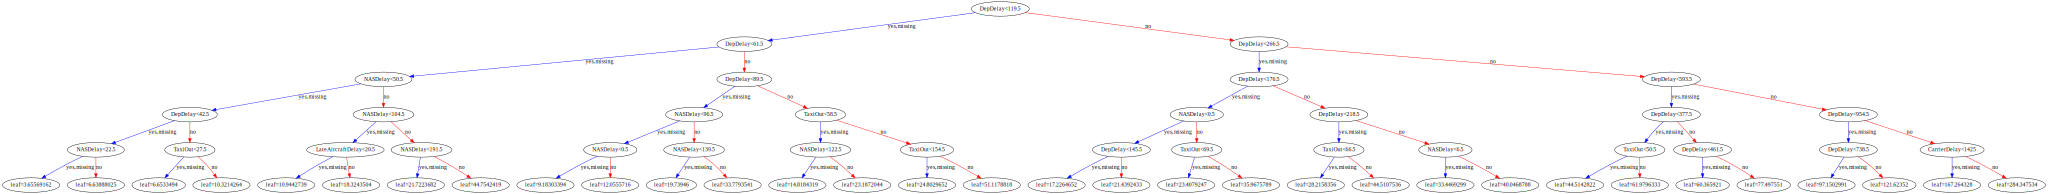

In [30]:
xgb.to_graphviz(model.get_booster(), num_trees=2)

In [31]:
format = 'png'

image = xgb.to_graphviz(model.get_booster(), num_trees=2)

#Set a different dpi (works only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('Graph_ML_XGBoost', format = format)

'Graph_ML_XGBoost.png'

### make predictions

In [32]:
x_test = test_df[feats].values
y_test = test_df['ArrDelay'].values

x_test.shape, y_test.shape

((249497, 23), (249497,))

In [33]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [37]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  3.273089


In [39]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 22.34%


### OOPS! Very low accuracy! Probably I should try something else